In [10]:
# Name: Sundar Swaminathan, Course: CIS-583, UMICH_ID: 29200876

False


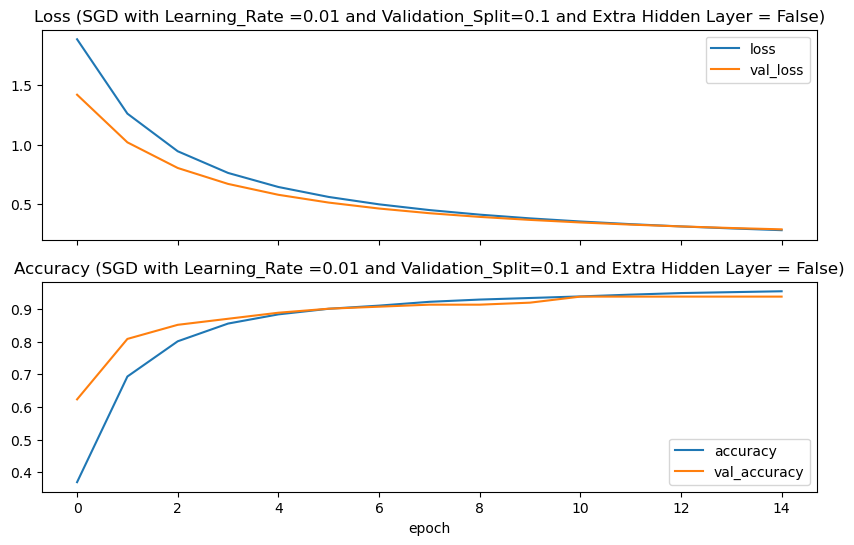

True


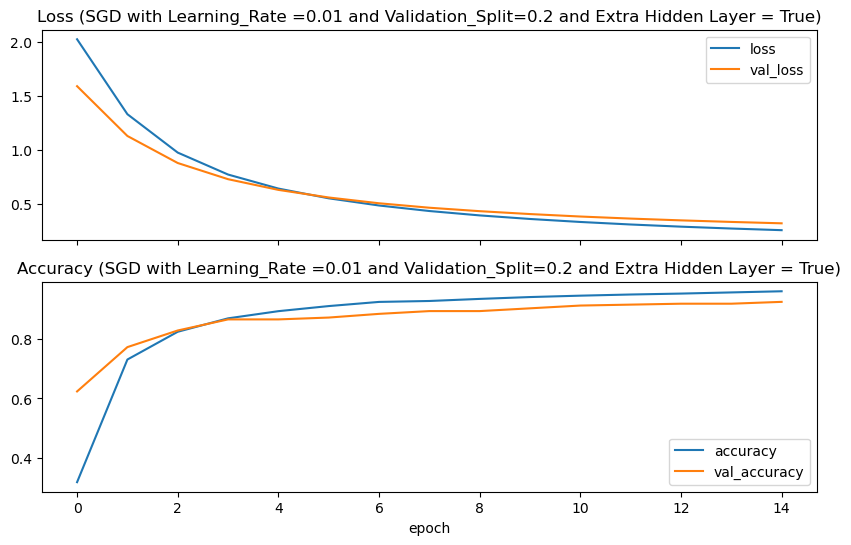

False


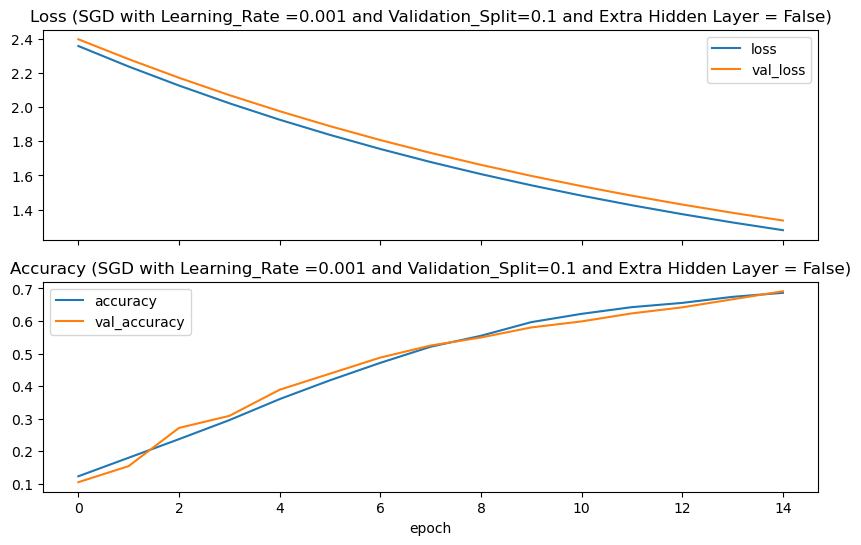

True


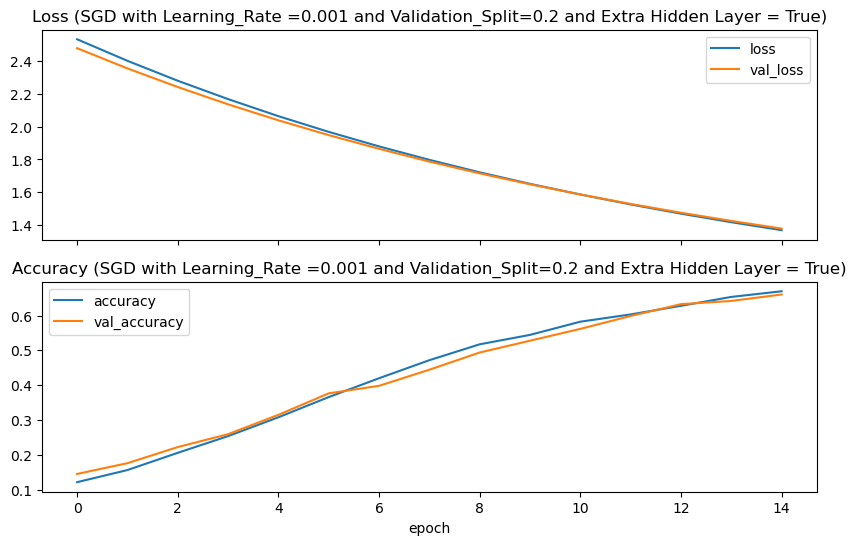

False


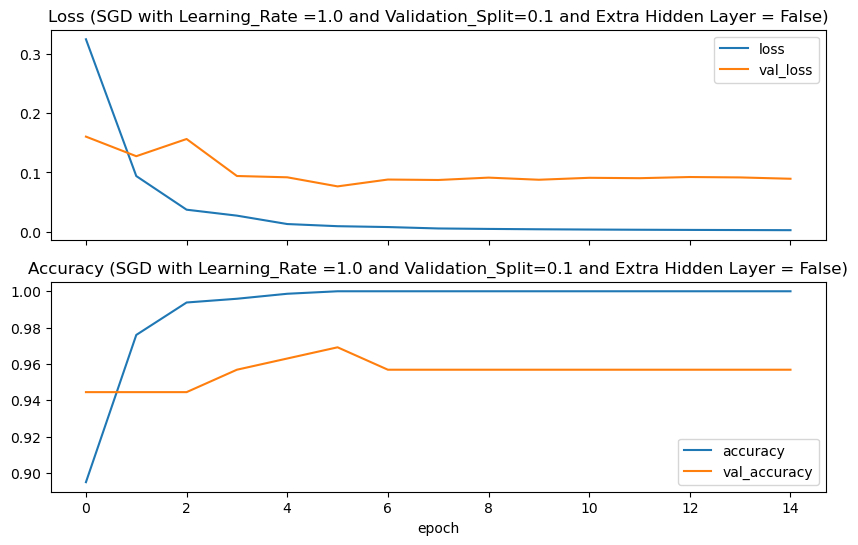

True


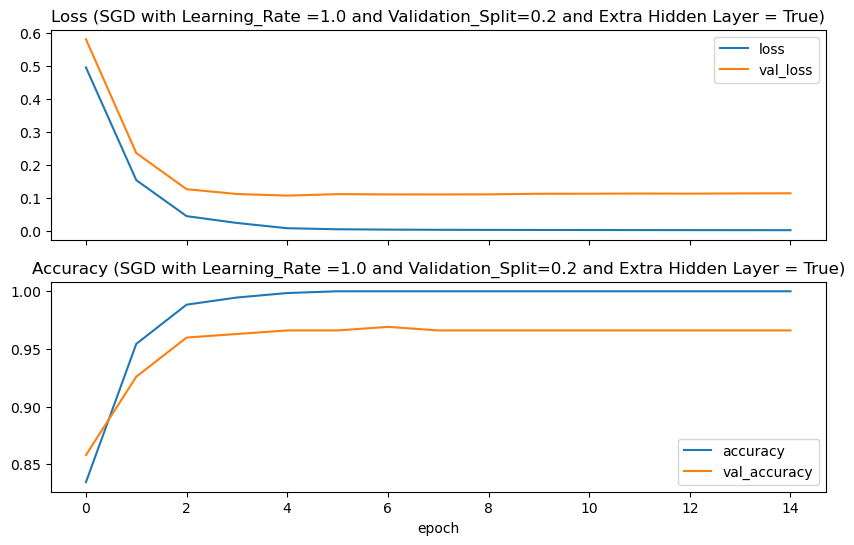

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import Input
from tensorflow.keras.callbacks import TensorBoard

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import datetime

import numpy as np

import pandas as pd

# Load data
digits = load_digits()
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='float32')
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

# Process data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Define shape
input_dim = X_train.shape[1] # 64
hidden_dim = 100
output_dim = Y_train.shape[1] # 10

# Tensorboard config
%reload_ext tensorboard
!rm -rf tensorboard_logs
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = f"tensorboard_logs/{timestamp}"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Modularise model creation
def build_model(optimizer, hidden_layer):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(100, activation="tanh"))
    if hidden_layer is True:
        model.add(Dense(100, activation="tanh"))
    model.add(Dense(10, activation="softmax"))
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Modularise training
def train_and_plot(optimizer, lr, vs, hidden_layer, title):
    print(hidden_layer)
    model = build_model(optimizer, hidden_layer)
    history = model.fit(X_train, Y_train, validation_split=vs, epochs=15, batch_size=32, verbose=0, callbacks=[tensorboard_callback])
    history_df = pd.DataFrame(history.history)
    history_df["epoch"] = history.epoch
    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))
    history_df.plot(x="epoch", y=["loss", "val_loss"], ax=ax0, title=f"Loss ({title})")
    history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax=ax1, title=f"Accuracy ({title})")
    plt.show()

# Run training
hidden_layer = True;
for learninig_rate in [0.01, 0.001, 1.0]:
    for validation_split in [0.1, 0.2]:
        hidden_layer = not hidden_layer
        train_and_plot(optimizers.SGD(learning_rate=learninig_rate), learninig_rate, validation_split, hidden_layer, f"SGD with Learning_Rate ={learninig_rate} and Validation_Split={validation_split} and Extra Hidden Layer = {hidden_layer}")

True


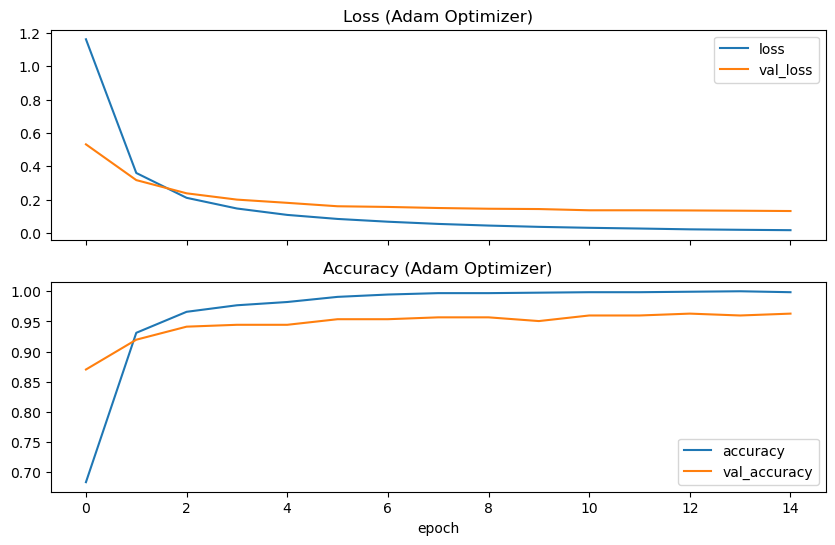

In [12]:
# Plot Adam optimizer to contrast it with SGD
train_and_plot(optimizers.Adam(), 'Default', 0.2, True, "Adam Optimizer")

In [13]:
# Create tensorboard with histogram and epoch_accuracy
%tensorboard --logdir tensorboard_logs --port=6007

Reusing TensorBoard on port 6007 (pid 23352), started 0:34:15 ago. (Use '!kill 23352' to kill it.)